# 泰坦尼克尼克号数据分析

## 事件背景  
泰坦尼克号是一艘奥林匹克级邮轮，1912年4月15日，载着1316名乘客和891名船员的泰坦尼克号与冰山相撞，在北大西洋沉没，该海难也被认为是20世纪人间十大灾难之一。 本文旨在穿越百年，探索在生死悠关时刻，人们做出了怎样的抉择，将生还的机会优先给予了哪些人？ 本文数据来自于官方公布的真实数据，数据来源于kaggle网站

![](https://upload-images.jianshu.io/upload_images/7218761-65ab4d51ebd758db.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)
点击[https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)，可将数据下载到本地使用。

In [1]:
#导入相关基础包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

#导入相关的建模工具包
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  #用来正常显示负号

# 1 导入数据 简单观察数据

In [2]:
train_data=pd.read_csv('input/train.csv')
test_data=pd.read_csv('input/test.csv')
X_train=train_data.drop(['Survived'],axis=1)
y_train=train_data['Survived']
X_test=test_data.copy()
concat_data=pd.concat([X_train,X_test])
all_data=[X_train,X_test]

### 各字段含义

|变量|含义|
|:--|:--|  
|`Age`|年龄|  
|`Cabin`|客舱号|  
|`Embarked`|登船港口(出发地点1：S = 英国南安普顿Southampton 途径地点1：C = 法国 瑟堡市Cherbourg 出发地点2：Q = 爱尔兰 昆士敦Queenstown )| 
|`Fare`|船票价格|  
|`Nmae`|姓名|  
|`Parch`|船上父母数/子女数(不同代直系亲属数)|  
|`Passenggerld`|乘客编号|  
|`Pclass`|客舱等级(1 = 一等舱，2 = 二等舱，3 = 三等舱)|  
|`Sex`|性别|  
|`SibSp`|穿上兄妹数/配偶数(同代直系亲属数)|  
|`Survived`|生存情况(1 = 存活，0 = 死亡)|  
|`Ticket`|船票编号|

In [3]:
concat_data.sample(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
132,1024,3,"Lefebre, Mrs. Frank (Frances)",female,NaN,0,4,4133,25.4667,NaN,S
194,195,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C
505,506,1,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,1,0,PC 17758,108.9000,C65,C


In [4]:
concat_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


_**从以上可以看出，字段age、Fare、Cabin、Embarked中存在有缺失值**_

In [5]:
concat_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [6]:
concat_data[concat_data.dtypes[concat_data.dtypes=='object'].index].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


# 2.1单个数据分析 sex 分析

In [7]:
concat_data['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [8]:
X_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
train_data[train_data['Survived']==1]['Sex'].value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [10]:
train_data[train_data['Survived']==0]['Sex'].value_counts()

male      468
female     81
Name: Sex, dtype: int64

In [11]:
train_data['Sex'].loc[train_data['Survived']==0].value_counts()  

male      468
female     81
Name: Sex, dtype: int64

In [12]:
survived_tmp=train_data['Sex'].loc[train_data['Survived']==1].value_counts()
dead_tmp=train_data['Sex'].loc[train_data['Survived']==0].value_counts()

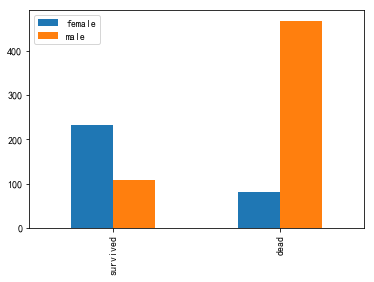

In [13]:
df_tmp=pd.DataFrame([survived_tmp,dead_tmp],index=['survived','dead'])
df_tmp.plot.bar()

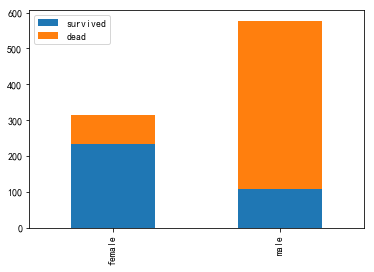

In [14]:
df_tmp=df_tmp.T
df_tmp.plot(kind='bar',stacked=True)

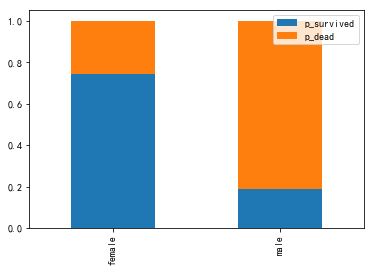

In [15]:
p_all_p=df_tmp['survived']+df_tmp['dead']    #当前总人数
df_tmp['p_survived']=df_tmp['survived']/(p_all_p)  #存活率
df_tmp['p_dead']=df_tmp['dead']/(p_all_p)  #死亡率
df_tmp[['p_survived','p_dead']].plot.bar(stacked=True)

**从以上可以看出，女性的存活率要远高于男性**

# 2.2 数据填补

_**数据填补方案**_:
- 连续值分布均衡用mean或median,不均衡用median

- 离散值采用mode

- 具有顺序逻辑采用median


In [16]:
train_data['Age'].fillna(concat_data['Age'].median(),inplace=True)

### Age分析 

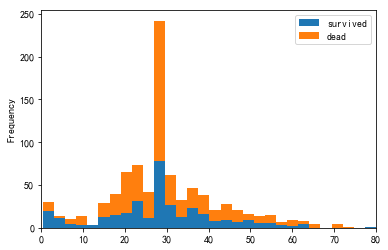

In [17]:
survivied_tmp1=train_data['Age'].loc[train_data['Survived']==1]
dead_tmp1=train_data['Age'].loc[train_data['Survived']==0]
df_tmp1=pd.DataFrame([survivied_tmp1,dead_tmp1],index=['survived','dead'])
df_tmp1=df_tmp1.T
df_tmp1
df_tmp1.plot.hist(stacked=True,bins=30,xlim=(0,80))

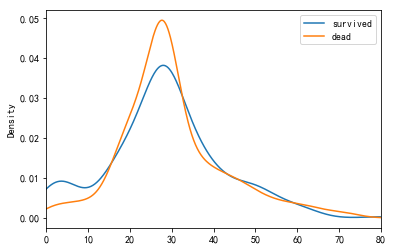

In [18]:
df_tmp1.plot.kde(xlim=(0,80))

In [19]:
train_data['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

### Fare 分析

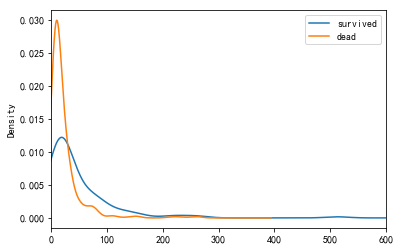

In [20]:
survived_tmp2=train_data['Fare'].loc[train_data['Survived']==1]
dead_tmp2=train_data['Fare'].loc[train_data['Survived']==0]
df=pd.DataFrame([survived_tmp2,dead_tmp2],index=['survived','dead'])
df=df.T
df.plot.kde(xlim=[0,600])

In [21]:
train_data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

### 船舱等级

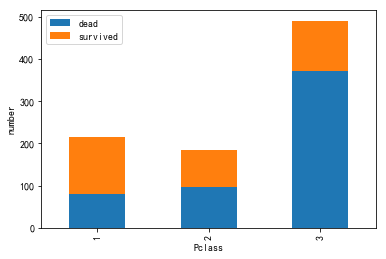

In [22]:
dead_0 = train_data.Pclass[train_data.Survived == 0].value_counts()
Survived_1 = train_data.Pclass[train_data.Survived == 1].value_counts()
df=pd.DataFrame({u'survived':Survived_1, u'dead':dead_0})
df.plot(kind='bar', stacked=True)
plt.xlabel(u"Pclass") 
plt.ylabel(u"number") 
plt.show()

### 港口

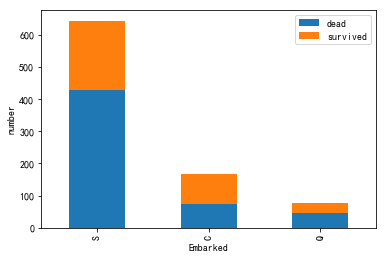

In [23]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

dead_0 = train_data.Embarked[train_data.Survived == 0].value_counts()
Survived_1 = train_data.Embarked[train_data.Survived == 1].value_counts()
df=pd.DataFrame({u'survived':Survived_1, u'dead':dead_0})
df.plot(kind='bar', stacked=True)
plt.xlabel(u"Embarked") 
plt.ylabel(u"number") 
plt.show()

# 2.3 多变量分析

- ### 年龄与票价

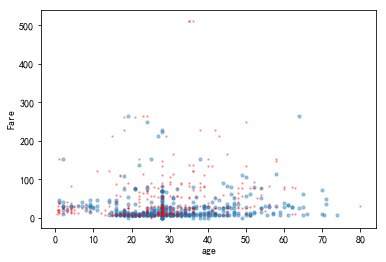

In [24]:
ax=plt.subplot()
age_tmp_d=train_data[train_data['Survived']==0]['Age']
Fare_tmp_d=train_data[train_data['Survived']==0]['Fare']


age_tmp_s=train_data[train_data['Survived']==1]['Age']
Fare_tmp_s=train_data[train_data['Survived']==1]['Fare']
plt.scatter(age_tmp_d,Fare_tmp_d,s=10,alpha=0.4)
plt.scatter(age_tmp_s,Fare_tmp_s,s=2,c='red',alpha=0.3)
ax.set_xlabel('age')
ax.set_ylabel('Fare')

- ### 年龄与社会等级分布

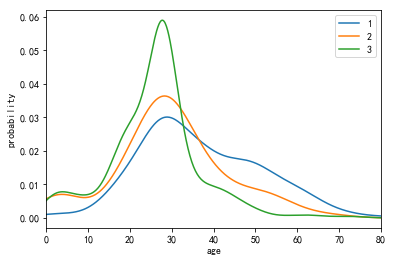

In [25]:
train_data.Age[train_data.Pclass == 1].plot(kind='kde',xlim=(0,80))   
train_data.Age[train_data.Pclass == 2].plot(kind='kde',xlim=(0,80))
train_data.Age[train_data.Pclass == 3].plot(kind='kde',xlim=(0,80))
plt.xlabel(u"age")# plots an axis lable
plt.ylabel(u"probability") 
plt.legend((u'1', u'2',u'3'),loc='best') # sets our legend for our graph.

- ### 性别与年龄

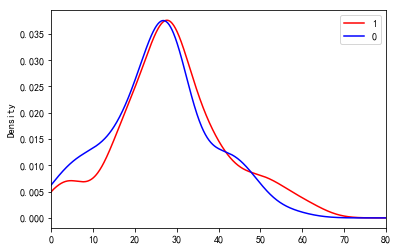

In [26]:
train_data.Age[(train_data.Sex == 'female') & (train_data.Survived==1)].plot(kind='kde',xlim=(0,80),c='r')  
train_data.Age[(train_data.Sex == 'female') & (train_data.Survived==0)].plot(kind='kde',xlim=(0,80),c='b') 
plt.legend((u'1', u'0'),loc='best')

## **各种舱级别情况下各性别的获救情况**

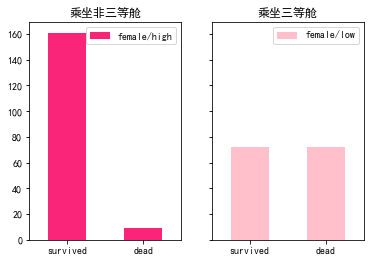

In [31]:
#女性
fig=plt.figure()
fig.set(alpha=0.65) # alpha是设置图像透明度

ax1=fig.add_subplot(121)
train_data.Survived[train_data.Sex == 'female'][train_data.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels([u"survived", u"dead"], rotation=0)
ax1.legend([u"female/high"], loc='best')
plt.title('乘坐非三等舱')

ax2=fig.add_subplot(122,sharey=ax1)
train_data.Survived[train_data.Sex == 'female'][train_data.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels([u"survived", u"dead"], rotation=0)
plt.legend([u"female/low"], loc='best')
plt.title('乘坐三等舱')

plt.show()

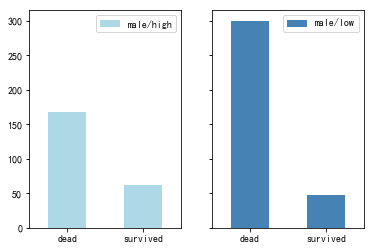

In [30]:
#男性
fig=plt.figure()
fig.set(alpha=0.85) # 设置图像透明度
ax3 = fig.add_subplot(121)
train_data.Survived[train_data.Sex == 'male'][train_data.Pclass != 3].value_counts(sort=False).plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels([u"dead",u"survived"], rotation=0)
plt.legend([u"male/high"], loc='best')

ax4=fig.add_subplot(122,sharey=ax3)
train_data.Survived[train_data.Sex == 'male'][train_data.Pclass == 3].value_counts(sort=False).plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels([u"dead",u"survived"], rotation=0)
plt.legend([u"male/low"], loc='best')
plt.show()

In [32]:
g = train_data.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df


PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7

### 堂兄弟/妹，孩子/父母有几人，对是否获救的影响？

In [33]:
g = train_data.groupby(['Parch','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1

In [34]:
train_data['FamilySize']=train_data['SibSp']+train_data['Parch']+1
g = train_data.groupby(['FamilySize','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
FamilySize Survived             
1          0                 374
           1                 163
2          0                  72
           1                  89
3          0                  43
           1                  59
4          0                   8
           1                  21
5          0                  12
           1                   3
6          0                  19
           1                   3
7          0                   8
           1                   4
8          0                   6
11         0                   7

#### Name 分析

In [35]:
concat_data['title']=concat_data.Name.apply(lambda name:name.split(',')[1].split('.')[0].strip())

In [36]:
str_tmp='Allen, Mr. William Henry'
print(str_tmp.split(','))
print(str_tmp.split(',')[1].split('.'))
print(str_tmp.split(',')[1].split('.')[0])
print(str_tmp.split(',')[1].split('.')[0].strip())

['Allen', ' Mr. William Henry']
[' Mr', ' William Henry']
 Mr
Mr


In [37]:
concat_data['title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Major             2
Mlle              2
Ms                2
Mme               1
Dona              1
Lady              1
Sir               1
Jonkheer          1
Don               1
the Countess      1
Capt              1
Name: title, dtype: int64

In [38]:
stat_min = 10 #确定一个最小数值
title_names = (concat_data['title'].value_counts() < stat_min) #这将创建一个以title名称作为索引的真假序列
title_names

Mr              False
Miss            False
Mrs             False
Master          False
Dr               True
Rev              True
Col              True
Major            True
Mlle             True
Ms               True
Mme              True
Dona             True
Lady             True
Sir              True
Jonkheer         True
Don              True
the Countess     True
Capt             True
Name: title, dtype: bool

In [39]:
X_train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [40]:
age_bins=[0,16,32,48,64,999]
age_labels=['0-16','16-32','32-48','48-64','64+']

Fare_bins=[0,7.9,14.5,31,666]
Fare_labels=['0-7','7-14','14-31','31+']

for data in all_data:
    data['Age'].fillna(concat_data['Age'].median(),inplace=True)
    data['Fare'].fillna(concat_data['Fare'].median(),inplace=True)
    data['Embarked'].fillna(concat_data['Embarked'].value_counts().index[0],inplace=True)
    data['AgeRange']=pd.cut(data['Age'],bins=age_bins,labels=age_labels,include_lowest=True)
    data['Fare']=pd.cut(data['Fare'],bins=Fare_bins,labels=Fare_labels,include_lowest=True)
    data['FamilySize']=data['SibSp']+data['Parch']+1
    data['isAlone']=1
    data['isAlone'].loc[data['FamilySize']>1]=0
    data['Sex']=data['Sex'].map({'male':0,'female':1}).astype(int)
    data['Embarked']=data['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)
    data['title']=data.Name.apply(lambda name:name.split(',')[1].split('.')[0].strip())
    data['title'] = data['title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
    
    
    

F:\Anaconda\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [41]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeRange,FamilySize,isAlone,title
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,0-7,NaN,2,32-48,1,1,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,0-7,NaN,0,32-48,2,0,Mrs
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,7-14,NaN,2,48-64,1,1,Mr
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,7-14,NaN,0,16-32,1,1,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,7-14,NaN,0,16-32,3,0,Mrs


In [42]:
X_train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeRange', 'FamilySize',
       'isAlone', 'title'],
      dtype='object')

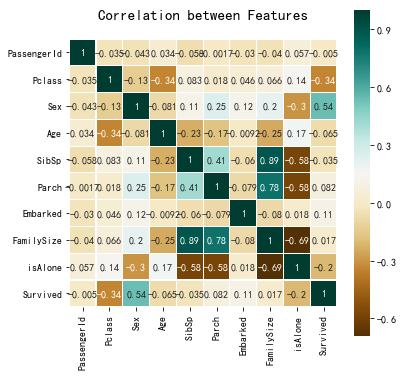

In [43]:
colormap = plt.cm.BrBG     #设置矩阵颜色
plt.figure(figsize=(6,6))
plt.title('Correlation between Features', y=1.05, size = 15)
sns.heatmap(pd.concat([X_train,y_train],axis=1).corr(),
            linewidths=0.1, 
            vmax=1.0, 
            square=True, 
           cmap=colormap, 
           linecolor='white', 
            annot=True)

In [44]:
X_train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeRange', 'FamilySize',
       'isAlone', 'title'],
      dtype='object')

In [45]:
X_train=pd.get_dummies(X_train,columns=['Pclass','Sex','FamilySize','Embarked','AgeRange','title'])
X_test=pd.get_dummies(X_test,columns=['Pclass','Sex','FamilySize','Embarked','AgeRange','title'])

In [46]:
X_train.columns

Index(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'isAlone', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_0',
       'Sex_1', 'FamilySize_1', 'FamilySize_2', 'FamilySize_3', 'FamilySize_4',
       'FamilySize_5', 'FamilySize_6', 'FamilySize_7', 'FamilySize_8',
       'FamilySize_11', 'Embarked_0', 'Embarked_1', 'Embarked_2',
       'AgeRange_0-16', 'AgeRange_16-32', 'AgeRange_32-48', 'AgeRange_48-64',
       'AgeRange_64+', 'title_Master', 'title_Misc', 'title_Miss', 'title_Mr',
       'title_Mrs'],
      dtype='object')

In [47]:
X_train.drop(['Pclass_1','Sex_0','FamilySize_1','Embarked_0','AgeRange_0-16'],
             axis=1, inplace=True)
X_test.drop(['Pclass_1','Sex_0','FamilySize_1','Embarked_0','AgeRange_0-16'],
            axis=1, inplace=True)

In [48]:
X_train.drop(['PassengerId','Age','SibSp','Parch','Fare','Name','Ticket','Cabin'],axis=1, inplace=True)
X_test.drop(['PassengerId','Age','SibSp','Parch','Fare','Name','Ticket','Cabin'],axis=1, inplace=True)

In [49]:
X_train.columns

Index(['isAlone', 'Pclass_2', 'Pclass_3', 'Sex_1', 'FamilySize_2',
       'FamilySize_3', 'FamilySize_4', 'FamilySize_5', 'FamilySize_6',
       'FamilySize_7', 'FamilySize_8', 'FamilySize_11', 'Embarked_1',
       'Embarked_2', 'AgeRange_16-32', 'AgeRange_32-48', 'AgeRange_48-64',
       'AgeRange_64+', 'title_Master', 'title_Misc', 'title_Miss', 'title_Mr',
       'title_Mrs'],
      dtype='object')

In [50]:
X_train.head()

,isAlone,Pclass_2,Pclass_3,Sex_1,FamilySize_2,FamilySize_3,FamilySize_4,FamilySize_5,FamilySize_6,FamilySize_7,...,Embarked_2,AgeRange_16-32,AgeRange_32-48,AgeRange_48-64,AgeRange_64+,title_Master,title_Misc,title_Miss,title_Mr,title_Mrs
0,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [51]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(random_state=0)
clf = clf.fit(X_train, y_train)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)

In [52]:
X_test_opt = model.transform(X_test)
feature_idx_test = model.get_support()
feature_name_test = X_test.columns[feature_idx_test]
print(feature_name_test)

Index(['Pclass_3', 'Sex_1', 'title_Miss', 'title_Mr', 'title_Mrs'], dtype='object')


In [53]:
classifier = LogisticRegression()


classifier.fit(X_train, y_train)

#10折交叉验证
acc_logreg = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

#可以检查每个拆分的准确性分数。 在这种情况下，有10个准确度分数
print(acc_logreg)

#Get mean of accuracy score of all cross validations
print(acc_logreg.mean() )

#Standard deviation = differences of the accuracy score in each cross validations. the less = less variance = the better
acc_logreg.std() 

[ 0.82222222  0.85555556  0.78651685  0.86516854  0.79775281  0.80898876
  0.80898876  0.79775281  0.85393258  0.84090909]
0.823778799228


0.026662034037104217

In [67]:
knn = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2 ) 
knn.fit(X_train, y_train)
acc_knn = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
knn_acc_mean = acc_knn.mean()
knn_std = acc_knn.std()
print('knn模型的精确度为：\n',acc_knn)
print('--'*40)
print('knn模型的平均精确度为：\n',knn_acc_mean)
print('--'*40)
print('knn模型的方差为：\n',knn_std)

knn模型的精确度：
 [ 0.77777778  0.78888889  0.78651685  0.78651685  0.79775281  0.76404494
  0.78651685  0.78651685  0.82022472  0.76136364]
--------------------------------------------------------------------------------
knn模型的平均精确度：
 0.785612019067
--------------------------------------------------------------------------------
knn模型的方差：
 0.0157287911136


In [68]:
naive = GaussianNB()
naive.fit(X_train, y_train)
acc_naive = cross_val_score(estimator = naive, X = X_train, y = y_train, cv = 10)
naive_acc_mean = acc_naive.mean()
naive_std = acc_naive.std()
print('GaussianNB模型的精确度为：\n',acc_naive)
print('--'*40)
print('GaussianNB模型的平均精确度为：\n',naive_acc_mean)
print('--'*40)
print('GaussianNB模型的方差为：\n',naive_std)

GaussianNB模型的精确度为：
 [ 0.48888889  0.44444444  0.42696629  0.40449438  0.43820225  0.42696629
  0.39325843  0.43820225  0.40449438  0.45454545]
--------------------------------------------------------------------------------
GaussianNB模型的平均精确度为：
 0.432046305754
--------------------------------------------------------------------------------
GaussianNB模型的方差为：
 0.0265351194588


In [70]:
dtree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtree.fit(X_train, y_train)
acc_dtree = cross_val_score(estimator = dtree, X = X_train, y = y_train, cv = 10)
dtree_acc_mean = acc_dtree.mean()
dtree_std = acc_dtree.std()
print('DecisionTreeClassifier模型的精确度为：\n',acc_dtree)
print('--'*40)
print('DecisionTreeClassifier模型的平均精确度为：\n',dtree_acc_mean)
print('--'*40)
print('DecisionTreeClassifier模型的方差为：\n',dtree_std)

DecisionTreeClassifier模型的精确度为：
 [ 0.76666667  0.8         0.78651685  0.83146067  0.84269663  0.75280899
  0.79775281  0.76404494  0.82022472  0.81818182]
--------------------------------------------------------------------------------
DecisionTreeClassifier模型的平均精确度为：
 0.798035410283
--------------------------------------------------------------------------------
DecisionTreeClassifier模型的方差为：
 0.0288643579956


In [71]:
rforest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rforest.fit(X_train, y_train)
acc_rforest = cross_val_score(estimator = rforest, X = X_train, y = y_train, cv = 10)
rforest_acc_mean = acc_rforest.mean()
rforest_std = acc_rforest.std()
print('RandomForestClassifier模型的精确度为：\n',acc_rforest)
print('--'*40)
print('RandomForestClassifier模型的平均精确度为：\n',rforest_acc_mean)
print('--'*40)
print('RandomForestClassifier模型的方差为：\n',rforest_std)

RandomForestClassifier模型的精确度为：
 [ 0.73333333  0.76666667  0.79775281  0.80898876  0.82022472  0.78651685
  0.80898876  0.75280899  0.80898876  0.81818182]
--------------------------------------------------------------------------------
RandomForestClassifier模型的平均精确度为：
 0.79024514811
--------------------------------------------------------------------------------
RandomForestClassifier模型的方差为：
 0.0282839747043


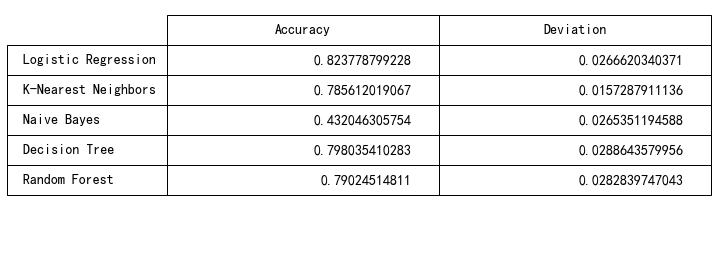

In [72]:
x_labels = ('Accuracy','Deviation')
y_labels = ('Logistic Regression','K-Nearest Neighbors','Naive Bayes','Decision Tree','Random Forest')

score_array = np.array([[logreg_acc_mean, logreg_std],
                        [knn_acc_mean, knn_std],
                        [naive_acc_mean, naive_std],
                        [dtree_acc_mean, dtree_std],
                        [rforest_acc_mean, rforest_std]])  
fig = plt.figure(1)
fig.subplots_adjust(left=0.2,top=0.8, wspace=1)
ax = plt.subplot2grid((4,3), (0,0), colspan=2, rowspan=2)

score_table = ax.table(cellText=score_array,
                       rowLabels=y_labels,
                       colLabels=x_labels,
                       loc='upper center')
score_table.set_fontsize(14)

ax.axis("off") # Hide plot axis
fig.set_size_inches(w=18, h=10)
plt.show()

**通过以上列表展示结果来看，Logistic Regression模型的精确度较高，并且其方差相对较小，模型性能稳定，可用于本项目的建模**

In [73]:
#用特使数据集对模型进行测试
y_pred = logreg.predict(X_test)
passengerId = test_data['PassengerId']
submission = pd.DataFrame({ 'PassengerId' : passengerId, 'Survived' : y_pred })
submission.to_csv('submission.csv', index=False)